In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_output.csv", encoding = "latin1")

In [3]:
df.head()

,label,id,name,username,bio,location,url,join_date,join_time,tweets,...,media,private,verified,profile_image_url,background_image,color_number,face_detection,follower/following_ratio,b_key_count,i_key_count
0,individual,379823034,mohammed,BarcaMohammed,NaN,North Bergen,NaN,9/25/11,9:33:00,172.0,...,1.0,0.0,0.0,https://pbs.twimg.com/profile_images/166601617...,NaN,51912.0,0.0,0.023256,0.0,0.0
1,individual,931229576,SaMisches,Shmisch,NaN,NaN,NaN,11/6/12,20:41:00,6.0,...,3.0,0.0,0.0,https://pbs.twimg.com/profile_images/930857677...,NaN,31033.0,0.0,0.108696,0.0,0.0
2,individual,393095898,Christopher Pawelski,ChrisPawelski,A 4th generation family onion farmer married t...,"Florida, NY",http://about.me/chris_pawelski,10/17/11,18:00:00,49503.0,...,23400.0,0.0,0.0,https://pbs.twimg.com/profile_images/686658233...,https://pbs.twimg.com/profile_banners/39309589...,46205.0,0.0,1.085431,0.0,1.0
3,individual,3109060051,xrishin,xrishin,NaN,NaN,NaN,3/26/15,19:39:00,3.0,...,0.0,1.0,0.0,https://abs.twimg.com/sticky/default_profile_i...,NaN,184.0,0.0,0.050000,0.0,0.0
4,business,1.13E+18,LENDVER,LendverLLC,BORROW CONFIDENTLY. We__Î¢_öÎå_Î¢ve do...,NaN,https://www.lendver.com/,5/29/19,7:32:00,2.0,...,1.0,0.0,0.0,https://pbs.twimg.com/profile_images/113375859...,https://pbs.twimg.com/profile_banners/11337428...,510.0,0.0,0.090909,0.0,0.0


In [4]:
df.shape

(11456, 23)

In [5]:
df.columns

Index(['label', 'id', 'name', 'username', 'bio', 'location', 'url',
       'join_date', 'join_time', 'tweets', 'following', 'followers', 'likes',
       'media', 'private', 'verified', 'profile_image_url', 'background_image',
       'color_number', 'face_detection', 'follower/following_ratio',
       'b_key_count', 'i_key_count'],
      dtype='object')

In [6]:
# 999 was a code we used when executing python face_detection library on twitter profile pictures. 
# Specifically, 999 indicated that there was an error/no picture found when iterating through thr profile pictures
df = df[df.face_detection != 999]
# code 1 was assigned if a face was deteced, code 0 was assigned if a face was not detected.

In [7]:
df.shape

(11264, 23)

In [8]:
# Create a column in dataframe indicating whether a url was linked on the twitter page or not. 
# If a url was detected, code 1 was assigned, else, 0 was assigned.
array = []
for i in list(df["url"]):
    if str(i) != "nan":
        array.append(1)
    else:
        array.append(0)
df["url_detect"] = array

In [9]:
# color_number column is a column that gives a count of the number of colors a profile picture has.
# We noticed that pictures with 184 colors all linked to the same default twitter profile picture.
# Since no face recognition or insightful color count can be returned and properly evaluated by the model,
# we decided to drop all rows that have a color count of 184.
# Coincidentally, we noticed color_number = 0 all corresponding face_detection = 999.
# Even though that was already dropped, we decided to add this precaution in case this was used on future scraped data
df = df[(df.color_number != 184) & (df.color_number !=0)]

In [10]:
df.shape

(10467, 24)

In [11]:
# Dataset used had 11401 rows, unclassified as business or not. Our team went into each twitter page to classify
# whether the page was a business or individual. Since 1000s of rows could not be manually classified, 
# we dropped many unclassified rows
df = df.loc[(df["label"] == "individual") | (df["label"] == "business"), :]

In [12]:
df.shape

(2359, 24)

In [13]:
# Drop columns we dont need for modeling
# df = df.drop(columns = ["name", "id", "url", "bio", "location", "join_date", "join_time", \
#                         "private", "verified", "profile_image_url", "background_image"])
df = df[["label", "username", "face_detection", "color_number", "b_key_count", "i_key_count", "url_detect"]]

In [14]:
df = df.dropna(how="any")

# Dropping data must be the last step, because there are blank fields in the dropped columns, which may have values
# in the variables we will take into consideration. Dropping pre-emptively will drop many rows unnecessarily

In [15]:
df.shape

(2357, 7)

In [16]:
df.head()

,label,username,face_detection,color_number,b_key_count,i_key_count,url_detect
0,individual,BarcaMohammed,0.0,51912.0,0.0,0.0,0
1,individual,Shmisch,0.0,31033.0,0.0,0.0,0
2,individual,ChrisPawelski,0.0,46205.0,0.0,1.0,1
4,business,LendverLLC,0.0,510.0,0.0,0.0,1
6,individual,ClaretSport,1.0,41897.0,0.0,0.0,1


In [17]:
# Assign X (data) and y (target)
X = df.drop(["label", "username"], axis=1)
y = df["label"]
print(X.shape, y.shape)

(2357, 5) (2357,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [20]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Label-encode data set (y_train was previously "business" or "individual", which needed to be numbers) 
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.


In [22]:
# first, create a normal neural network with 5 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='tanh', input_dim=5))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Fit the model to the training data
fit = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=0
)

Instructions for updating:
Use tf.cast instead.


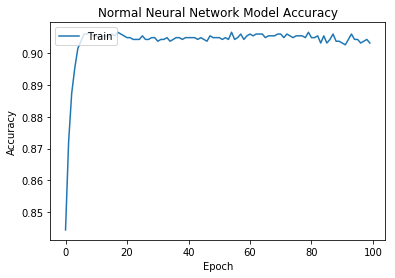

In [48]:
import matplotlib.pyplot as plt
# Plot training accuracy by Epoch

plt.plot(fit.history['acc'])
plt.title('Normal Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [27]:
deep_model = Sequential()
deep_model.add(Dense(units=2, activation='tanh', input_dim=5))
deep_model.add(Dense(units=2, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [28]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_fit = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=0
)

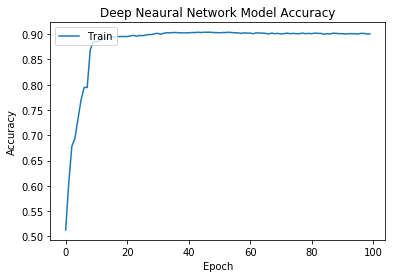

In [29]:
plt.plot(deep_fit.history['acc'])
plt.title('Deep Neaural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [30]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.2754 - acc: 0.8966
Normal Neural Network - Loss: 0.27540815341270575, Accuracy: 0.8966101408004761


In [31]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.2742 - acc: 0.9017
Deep Neural Network - Loss: 0.27420197497990173, Accuracy: 0.9016948938369751


In [32]:
# Save the model
model.save("twitter_normal_neural_trained.h5")

In [33]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_categorical)
rf.score(X_train_scaled, y_train_categorical)

0.9954725523486134

In [34]:
# Get weights that machine defined, multiplied by 100 to get percents
importances = rf.feature_importances_*100
importances

array([28.6462863 , 53.58626909,  9.1445904 ,  1.78335246,  6.83950176])

In [35]:
# Create data frame of features and their importance; convert to csv
feature_importances = sorted(zip(importances, X), reverse=True)
feature_importances = list(feature_importances)
feature_importances = pd.DataFrame(feature_importances, columns = ["Importance", "Feature Name"])
feature_importances.to_csv("feature_importances.csv", index=False)

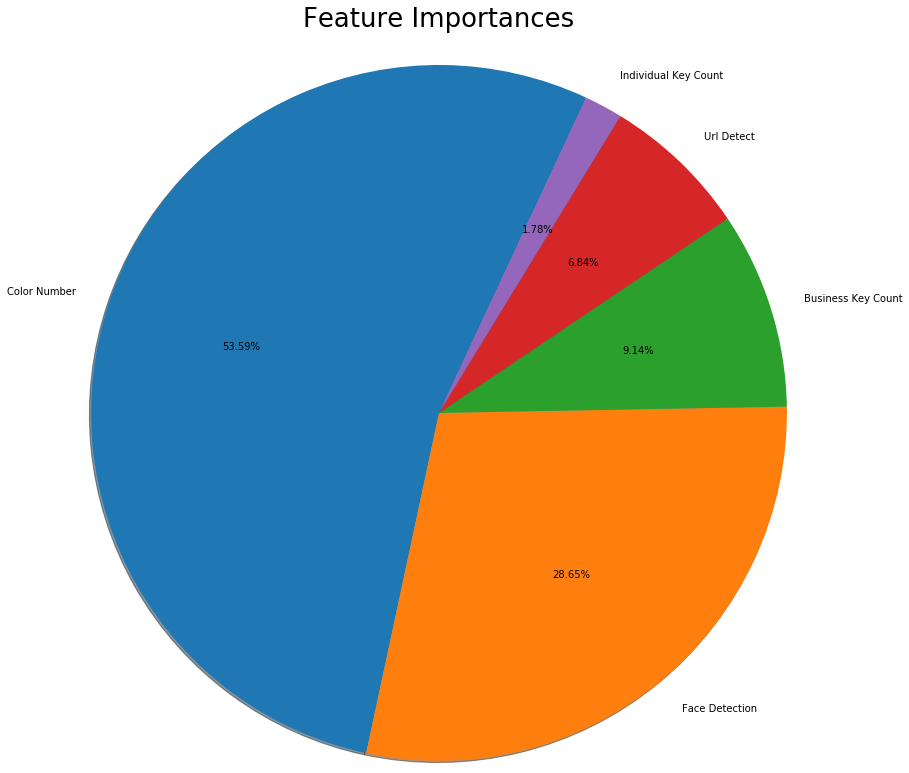

In [36]:
#  Plot feature importances
labels = [label.title().replace("_", " ").replace("B", "Business").replace("I", "Individual") \
          for label in feature_importances["Feature Name"]]

plt.pie(feature_importances["Importance"], labels=labels,
        autopct="%1.2f%%", shadow=True, startangle=65, radius=4)
plt.title("Feature Importances", y = 2.25, fontsize = 26)
plt.show()

In [37]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
comparison = pd.DataFrame({"prediction": prediction_labels, "actual": y_test})
comparison.head()

,prediction,actual
10300,business,business
1404,individual,individual
10284,individual,individual
2494,business,business
1935,business,individual


In [38]:
# joined dataset so we can see usernames and predictions/actual side by side
merged_comparsion = df.join(comparison)
merged_comparsion = merged_comparsion[["username", "prediction", "actual"]]
merged_comparsion = merged_comparsion.dropna(how="any")
merged_comparsion.head()

,username,prediction,actual
2,ChrisPawelski,individual,individual
10,Arvidinvest,business,individual
17,pattyshort,individual,individual
21,HarshnaParoha,individual,individual
23,jsare34,individual,individual


In [39]:
merged_comparsion.to_csv("merged_comparsion_test.csv", index=False)

In [40]:
# get rows in which the predicted did not match the actual data
discrepencies = comparison[comparison["prediction"] != comparison["actual"]]
discrepencies.head()

,prediction,actual
1935,business,individual
10,business,individual
629,individual,business
487,business,individual
1385,individual,business


In [41]:
# join data frames to include username and join on index; index number was previously retained
merged_discrepencies = df.join(discrepencies)
merged_discrepencies = merged_discrepencies[["username", "face_detection", "color_number", \
                                             "b_key_count", "i_key_count", "url_detect", "prediction", "actual"]]
merged_discrepencies = merged_discrepencies.dropna(how="any")
merged_discrepencies.head()

,username,face_detection,color_number,b_key_count,i_key_count,url_detect,prediction,actual
10,Arvidinvest,0.0,256.0,0.0,1.0,0,business,individual
50,72Services,1.0,33542.0,0.0,0.0,1,individual,business
128,smcolonius,0.0,5265.0,0.0,0.0,1,business,individual
166,EduardoVega01,0.0,8172.0,0.0,0.0,1,business,individual
184,ASFASTAS1232,0.0,4246.0,0.0,0.0,1,business,individual


In [42]:
# Pre-processing. All the same steps as was done on test data set

unclassified = pd.read_csv("final_output.csv", encoding ="latin1")

unclassified = unclassified[unclassified.face_detection != 999]

array = []
for i in list(unclassified["url"]):
    if str(i) != "nan":
        array.append(1)
    else:
        array.append(0)
unclassified["url_detect"] = array

unclassified = unclassified[(unclassified.color_number != 184) & (unclassified.color_number !=0)]

unclassified = unclassified[["label", "username", "face_detection", "color_number", \
                             "b_key_count", "i_key_count", "url_detect"]]

# get only nan values from label
unclassified = unclassified[unclassified.label != "business"]
unclassified = unclassified[unclassified.label != "individual"]

# add index number column for a join
unclassified = unclassified.reset_index()
# Will need to drop all NaN values, but cannot do this without removing label column from data frame.
# Create temporary data frame with index column so it can be later joined
unclassified_label = unclassified[["index", "label"]]
# unclassified = unclassified.drop(["label"], axis=1)
unclassified = unclassified.drop(["label"], axis=1)
unclassified = unclassified.dropna(how="any")
unclassified = unclassified_label.merge(unclassified, how="inner", on="index")


unclassified_X = unclassified.drop(["index", "label", "username"], axis=1)
unclassified_X.shape

(8016, 5)

In [43]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(unclassified_X)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [44]:
X_scaled = X_scaler.transform(unclassified_X)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [45]:
# Predict on new data set
unclassified_predictions = model.predict_classes(X_scaled)
prediction_labels = label_encoder.inverse_transform(unclassified_predictions)

unclassified_pred_df = pd.DataFrame({"unclassified predictions": prediction_labels})
unclassified_pred_df.shape

(8016, 1)

In [46]:
unclassified_merge = unclassified.join(unclassified_pred_df)
unclassified_merge = unclassified_merge[["username", "face_detection", "color_number", \
                                             "b_key_count", "i_key_count", "url_detect", "unclassified predictions"]]
unclassified_merge.head()

,username,face_detection,color_number,b_key_count,i_key_count,url_detect,unclassified predictions
0,caitiecouch325,1.0,33377.0,0.0,0.0,1,individual
1,SadaKaloZia,1.0,38147.0,0.0,0.0,1,individual
2,MusketeersTele,0.0,106.0,0.0,0.0,0,business
3,repport4,0.0,9045.0,0.0,0.0,0,business
4,twerkGerl,0.0,35878.0,0.0,0.0,1,business


In [47]:
unclassified_merge.to_csv("unclassified_merge.csv", index=False)